In [14]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

ST means Sinus Tachycardia

Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol: cholesterol in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl)

1 = true

0 = false

rest_ecg: resting electrocardiographic results Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina

1 = yes

0 = no

old peak: ST depression induced by exercise relative to rest

slp: the slope of the peak exercise ST segment

0 = unsloping

1 = flat

2 = downsloping

caa: number of major vessels (0-3)

thall : thalassemia

0 = null

1 = fixed defect

2 = normal

3 = reversable defect

output: diagnosis of heart disease (angiographic disease status) 0: < 50% diameter narrowing. less chance of heart disease

1: > 50% diameter narrowing. more chance of heart disease

In [5]:
filename = '/content/heart.csv'
df= pd.read_csv(filename)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


-eliminado las columnas innecesarias

La mayoria tienen correlacion con mi objetivo asi que opte por mantener el dataset completo

-eliminado las filas duplicadas

In [7]:
# Count the duplicates
df.duplicated().sum()

1

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

In [9]:
# Check columns, rows, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [34]:
df['chol'].value_counts()

204    6
197    6
234    6
212    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [12]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

-identificado y abordado los valores faltantes 

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

-producido visuales univariantes para el objetivo y todas las características

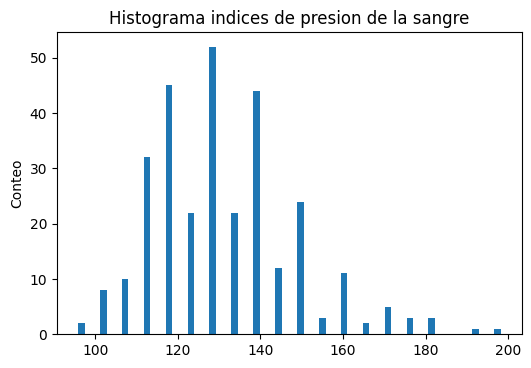

In [17]:
num_bins = 20
fig1 = plt.figure(dpi=100)
Sangrepr = fig1.add_subplot(1,1,1)
Sangrepr.hist(df['trtbps'], num_bins, density=False, rwidth=0.3);
Sangrepr.set_ylabel("Conteo")
Sangrepr.set_title("Histograma indices de presion de la sangre")
plt.show()

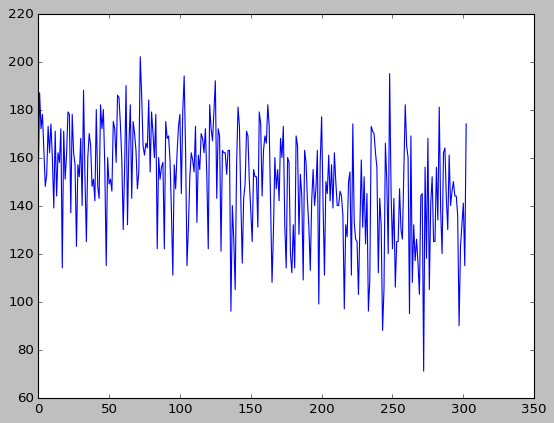

In [22]:
plt.style.use('classic')
plt.plot(df['thalachh']);

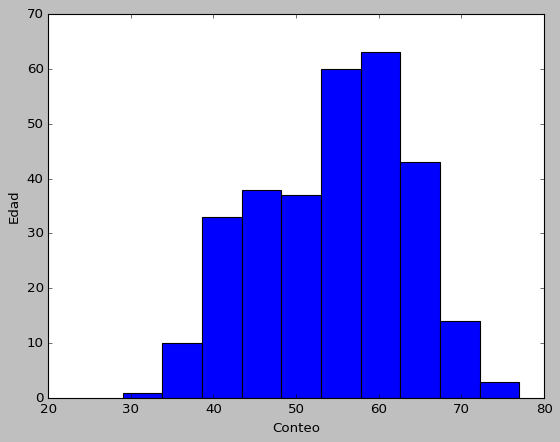

In [25]:
plt.hist(df['age'])
plt.ylabel("Edad")
plt.xlabel("Conteo")
plt.show()

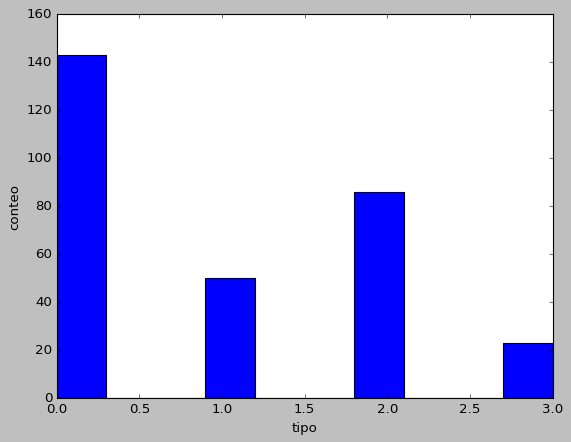

In [27]:
plt.hist(df['cp'])
plt.ylabel("conteo")
plt.xlabel("tipo")
plt.show()

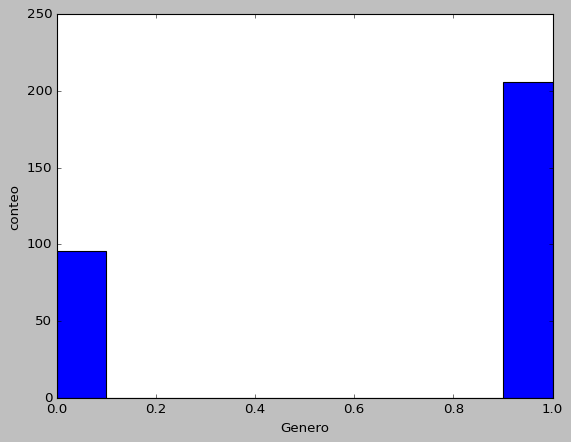

In [28]:
plt.hist(df['sex'])
plt.ylabel("conteo")
plt.xlabel("Genero")
plt.show()

Text(0.5, 0, 'colesterol en mg/dl')

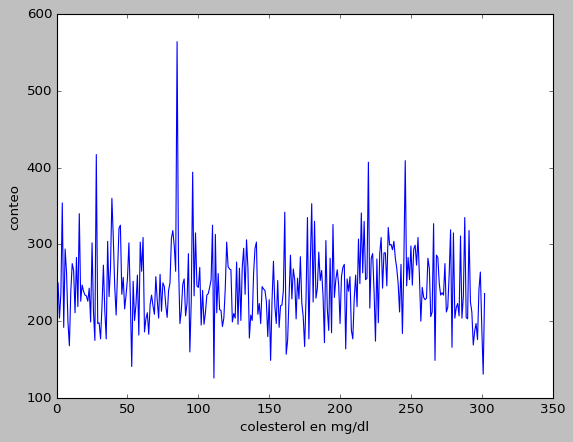

In [35]:
plt.style.use('classic')
plt.plot(df['chol']);
plt.ylabel("conteo")
plt.xlabel("colesterol en mg/dl")

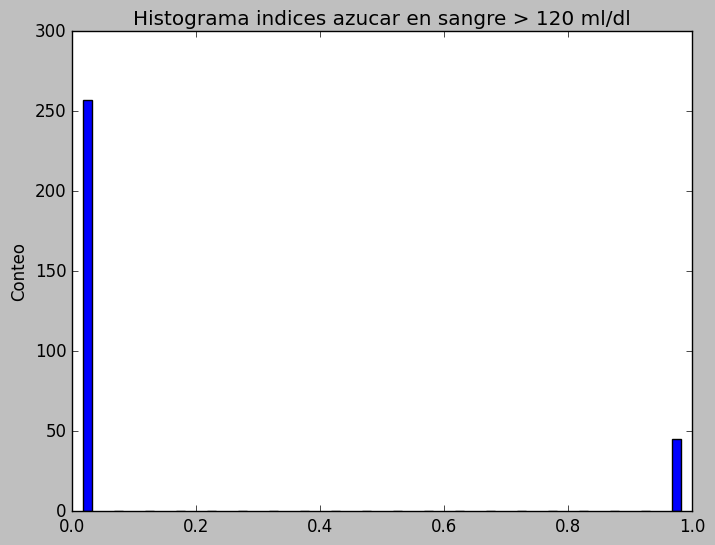

In [37]:
num_bins = 20
fig1 = plt.figure(dpi=100)
Sangrepr = fig1.add_subplot(1,1,1)
Sangrepr.hist(df['fbs'], num_bins, density=False, rwidth=0.3);
Sangrepr.set_ylabel("Conteo")
Sangrepr.set_title("Histograma indices azucar en sangre > 120 ml/dl")
plt.show()

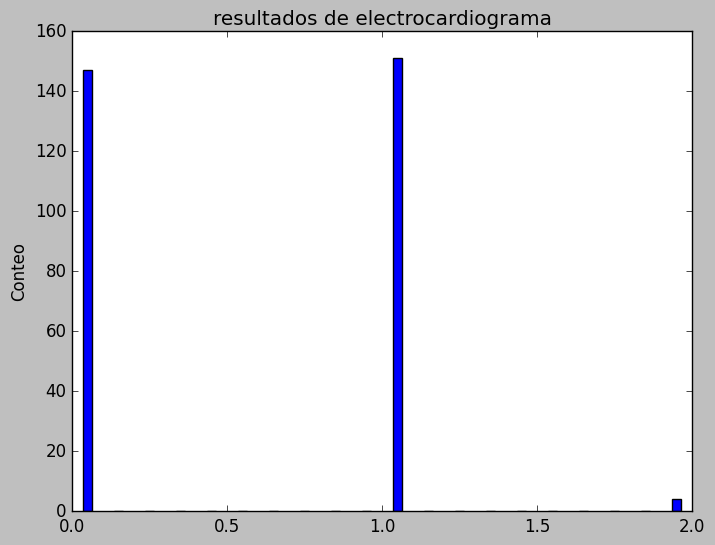

In [40]:
num_bins = 20
fig1 = plt.figure(dpi=100)
reservaciones = fig1.add_subplot(1,1,1)
reservaciones.hist(df['restecg'], num_bins, density=False, rwidth=0.3);
reservaciones.set_ylabel("Conteo")
reservaciones.set_title("resultados de electrocardiograma")
plt.show()

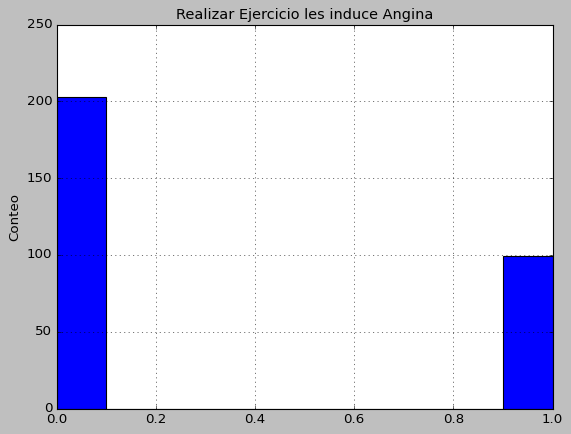

In [45]:
df['exng'].hist(bins = 10, edgecolor='black');
plt.title('Realizar Ejercicio les induce Angina', fontsize = 13)
plt.ylabel('Conteo');

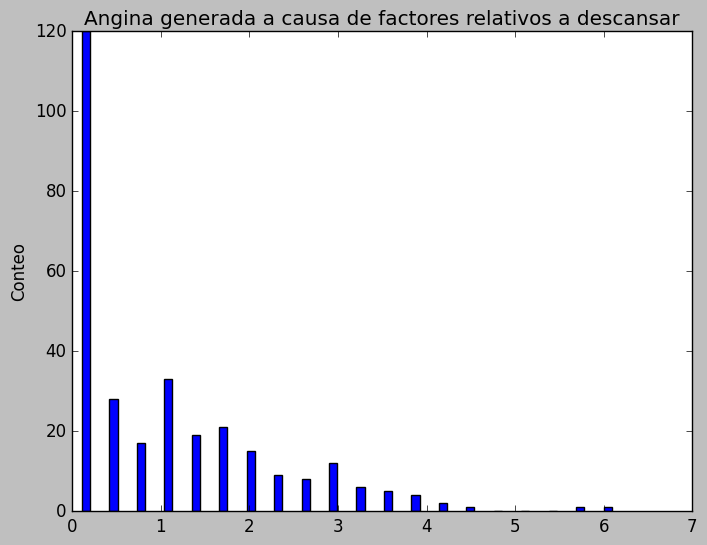

In [49]:
num_bins = 20
fig1 = plt.figure(dpi=100)
reservaciones = fig1.add_subplot(1,1,1)
reservaciones.hist(df['oldpeak'], num_bins, density=False, rwidth=0.3);
reservaciones.set_ylabel("Conteo")
reservaciones.set_title("Angina generada a causa de factores relativos a descansar")
plt.show()

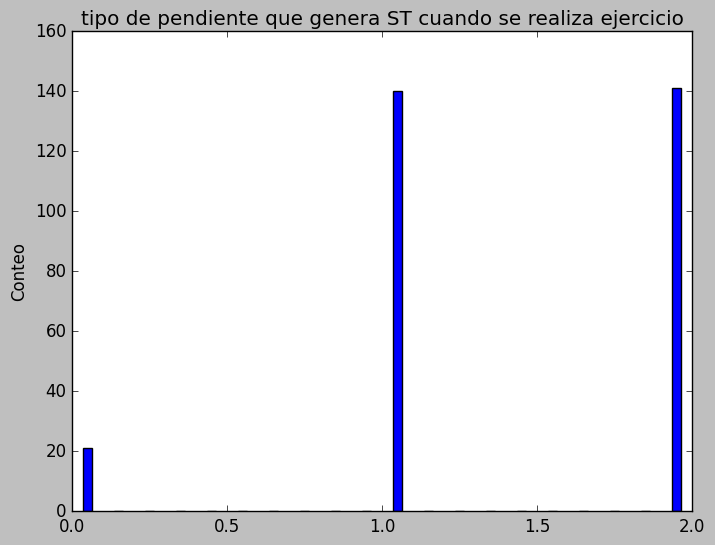

In [50]:
num_bins = 20
fig1 = plt.figure(dpi=100)
reservaciones = fig1.add_subplot(1,1,1)
reservaciones.hist(df['slp'], num_bins, density=False, rwidth=0.3);
reservaciones.set_ylabel("Conteo")
reservaciones.set_title("tipo de pendiente que genera ST cuando se realiza ejercicio")
plt.show()

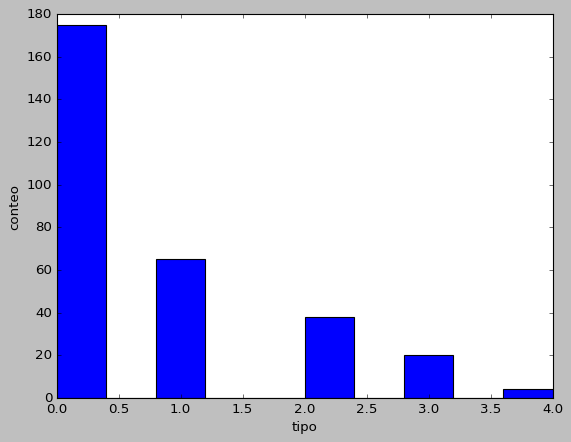

In [51]:
plt.hist(df['caa'])
plt.ylabel("conteo")
plt.xlabel("tipo")
plt.show()

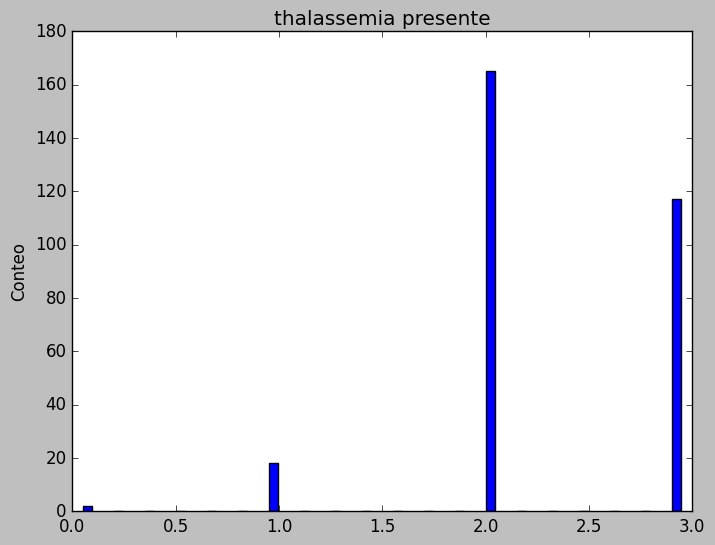

In [53]:
num_bins = 20
fig1 = plt.figure(dpi=100)
reservaciones = fig1.add_subplot(1,1,1)
reservaciones.hist(df['thall'], num_bins, density=False, rwidth=0.3);
reservaciones.set_ylabel("Conteo")
reservaciones.set_title("thalassemia presente")
plt.show()

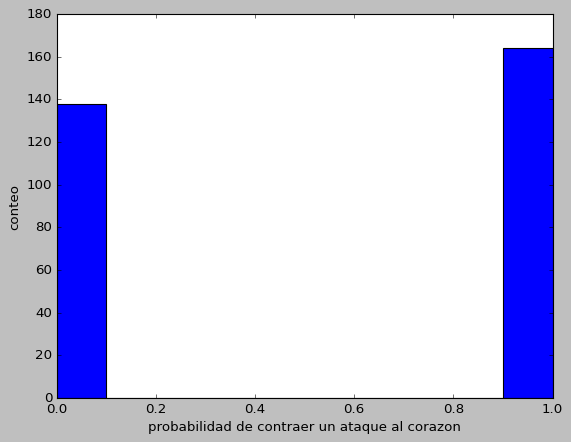

In [55]:
plt.hist(df['output'])
plt.ylabel("conteo")
plt.xlabel("probabilidad de contraer un ataque al corazon")
plt.show()

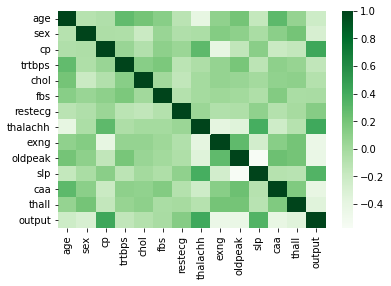

In [16]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens');